What causes outliers
Outliers depend on the assumptions of the underlying data structure

[Background for Outliers](http://pareonline.net/getvn.asp?v=9&n=6)

[Ways to detect outerliers](http://www.dbs.ifi.lmu.de/~zimek/publications/KDD2010/kdd10-outlier-tutorial.pdf)

### Why outliers is harmful?

* Outliers bias the mean and inflate the standard deviation  and screening data is an important way to detect them
* adversely lead to model misspecification, biased parameter estimation and incorrect results.

*A set of many abnormal data objects that are similar to each other would
be recognized as a cluster rather than as noise/outliers*

### How to find the outliers 

#### Statistics based 

##### Uni-variate

* For a single variable/feature

1. **graph**: 
the data with a histogram or boxplot
2. **z-scores**
5% to have absolute values greater than 1.96 (we often use 2 for convenience),  and 1% to have absolute values greater than 2.58, and none to be greater than about 3.29.
3. **Inter-quartile**
[Q1 – 1.5 * IQD, Q3 + 1.5 * IQD]


* Think of a data points of mutiple dimensions

##### Multi-variate 

Mahalanobis distance

those observations with a large Mahalanobis distance are indicated
as outliers

* Curse of dimensionality: When the data have too many dimensions the distance becomes similar
* The mean and median was used including the outliers as well
* Assumption of the data following the multivariate guassian distribution

#### Depth-based

– Search for outliers at the border of
the data space but independent of statistical distribution

– Organize data objects in convex hull layers convex hull layers

– Outliers are objects on outer layers

#### Deviation_based Approaches

– Given a set of data points (local group or global set)

– Outliers are points that do not fit to the general characteristics of that set i e the variance of the set is minimized when removing the set, i.e., the variance of the set is minimized when removing the outliers

#### Distance_based Approaches

– Judge a point based on the distance(s) to its neighbors

– Several variants proposed
• Basic Assumption
– Normal data objects have a dense neighborhood
– Outliers are far apart from their neighbors, i.e., have a less dense neighborhood

#### Density_based Approaches

– Compare the density around a point with the density around its local
neighbors

– The relative density of a point compared to its neighbors is computed The relative density of a point compared to its neighbors is computed as an outlier score

– Approaches essentially differ in how to estimate density

– The density around a normal data object is similar to the density
around its neighbors
– The density around an outlier is considerably different to the density
around its neighbors 

#### Also we can use either cluster or pattern basedthe association rules to detect whether there is any outliers 

### How to deal with outliers

<h3 align = "center"><font color = "red"> Regression </font></h3>

* Remove the minority of the outlier cases
* Transformation of the data to make the outlier to be less impactful
*may not be appropriate for the model being tested, or may affect its interpretation in undesirable ways.  Taking the log of a variable makes a distribution less skewed, but it also alters the relationship between the original variables in the model.*
* Trunction: Use an upper limit to represent all the outliers
* Don't change your data but compute the statistics in a different way. A common robust estimation method for univariate distributions involves the use of a trimmed mean, which is calculated by temporarily eliminating extreme observations at both ends of the sample (Anscombe, 1960).  Alternatively, researchers may choose to compute a Windsorized mean, for which the highest and lowest observations are temporarily censored, and replaced with adjacent values from the remaining data 

<h3 align = "center"><font color = "red"> Classification</font></h3>

* Use a model that's resistant to outliers. Tree-based models are generally not as affected by outliers, while regression-based models are. If you're performing a statistical test, try a non-parametric test instead of a parametric one.

* Use a more robust error metric. As Peter Mills mentions in his excellent answer, switching from mean squared error to mean absolute difference (or something like Huber Loss) reduces the influence of outliers.

### R codes for outlier detection

#### Statistics based

* Use z-score

In [6]:

outlierSummary<-function(variable, digits = 2){

   zvariable<-(variable-mean(variable, na.rm = TRUE))/sd(variable, na.rm = TRUE)
   outlier95<-abs(zvariable) >= 1.96
   outlier99<-abs(zvariable) >= 2.58
   outlier999<-abs(zvariable) >= 3.29
   ncases<-length(na.omit(zvariable))

   percent95<-round(100*length(subset(outlier95, outlier95 == TRUE))/ncases, digits)
   percent99<-round(100*length(subset(outlier99, outlier99 == TRUE))/ncases, digits)
   percent999<-round(100*length(subset(outlier999, outlier999 == TRUE))/ncases, digits)

   cat("Absolute z-score greater than 1.96 = ", percent95, "%", "\n")
   cat("Absolute z-score greater than 2.58 = ",  percent99, "%", "\n")
   cat("Absolute z-score greater than 3.29 = ",  percent999, "%", "\n")
}

In [7]:
outlierSummary(iris[,1])

Absolute z-score greater than 1.96 =  4 % 
Absolute z-score greater than 2.58 =  0 % 
Absolute z-score greater than 3.29 =  0 % 


* Use inter-quartile

In [21]:
FindOutliers <- function(data,c) {
  lowerq = quantile(data)[2]
  upperq = quantile(data)[4]
  iqr = upperq - lowerq #Or use IQR(data)
  # we identify extreme outliers
  extreme.threshold.upper = (iqr * c) + upperq
  extreme.threshold.lower = lowerq - (iqr * c)
  result <- which(data > extreme.threshold.upper | data < extreme.threshold.lower)
    return(result)
}

# use the function to identify outliers
FindOutliers(iris[,2], 1)


[1]   6  15  16  17  33  34  61  63  69 120

#### Density_based Approaches

Warning message:
: package 'DMwR' was built under R version 3.3.1Loading required package: lattice
Loading required package: grid


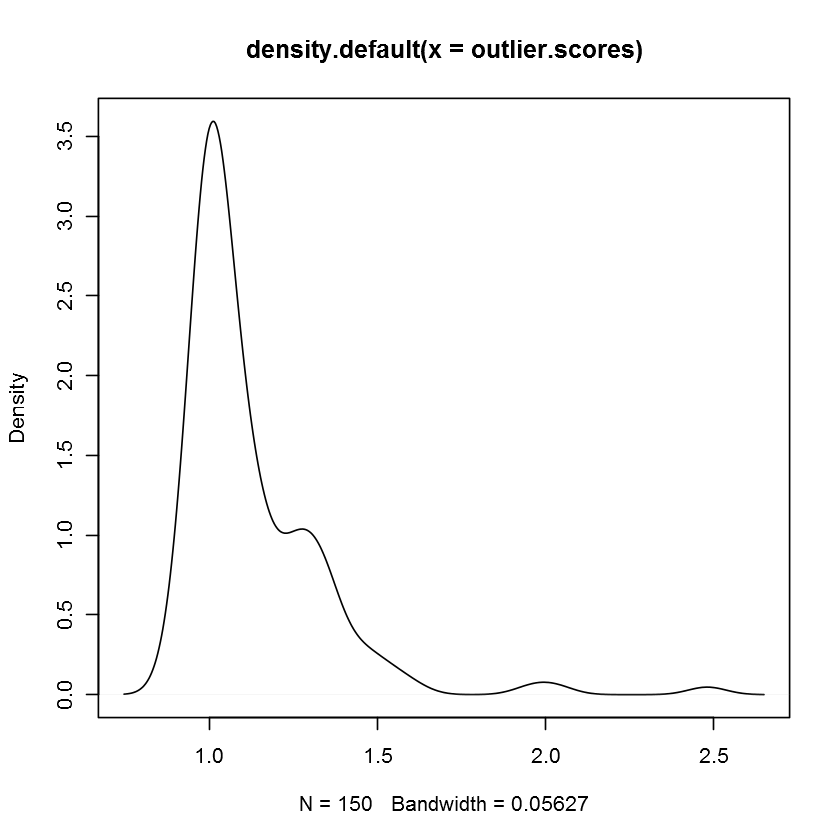

In [2]:
library(DMwR)
iris2 <- iris[,1:4]
 outlier.scores <- lofactor(iris2, k=5)
plot(density(outlier.scores))

In [3]:

outliers <- order(outlier.scores, decreasing=T)[1:5]
print(outliers)


[1]  42 107  23 110  63


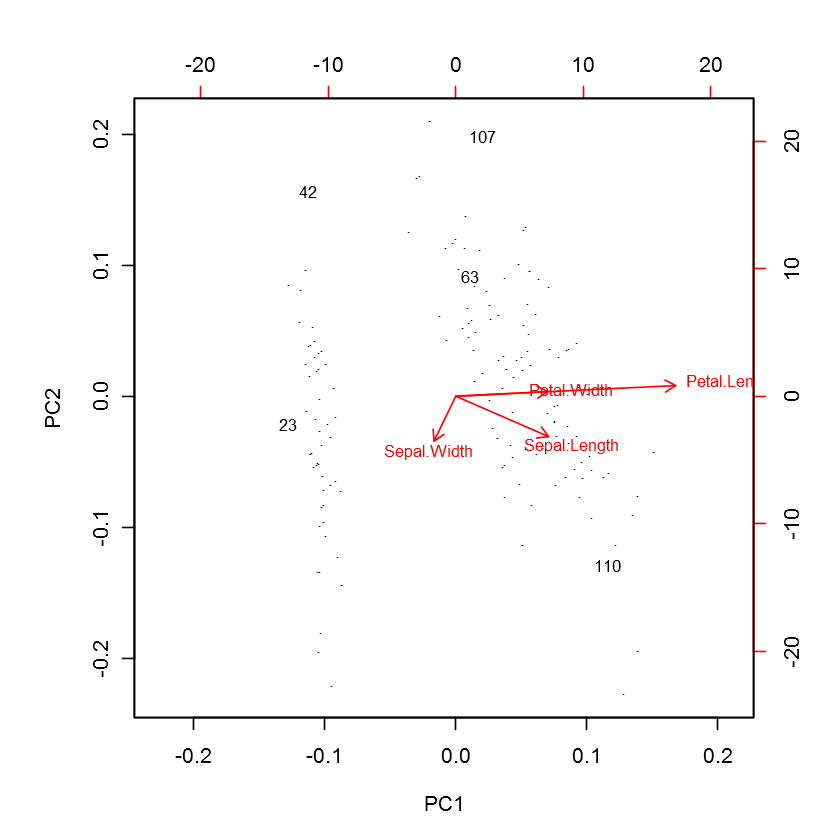

In [4]:
n <- nrow(iris2)
labels <- 1:n
labels[-outliers] <- "."
biplot(prcomp(iris2), cex=.8, xlabs=labels)

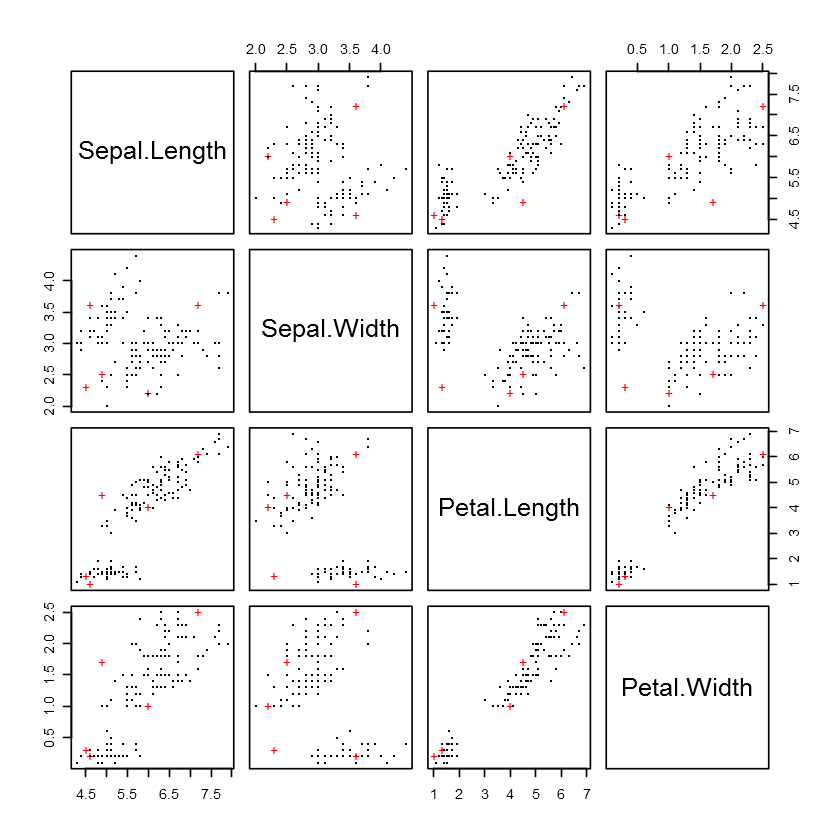

In [5]:
pch <- rep(".", n)
pch[outliers] <- "+"
col <- rep("black", n)
col[outliers] <- "red"
pairs(iris2, pch=pch, col=col)